Skylar Stolte
BME6938
10/16/18
Homework 2

In [14]:
#import needed libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
%matplotlib inline

I load everything I need here because I prefer to keep imports together. This is just a personal preference. 

a) Load the dataset in an iPython notebook [2 point].

In [15]:
#read in data and check specifics
data = pd.read_csv('data.csv')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [16]:
#check shape: rows = patients, columns = attributes
data.shape

(195, 24)

B) Split the dataset for training a knn classifier in a holdout + cross-validation fashion. Run the k-nn (k-nearest neighbors)
algorithm on this dataset and find the optimal k using Grid search, where k={4, 5, 6, 7, 8, 9, 10} (Hint: use the 
GridSearchCV operator in  sklearn). [10 points]

In [26]:
#label cases (patients/rows) according to class label (status): 0 = no Parkinson's disease, 1 = Parkinson's disease
X = data.loc[:,'MDVP:Fo(Hz)':'PPE'].values
Y = data.loc[:,'status'].values

[[1.199920e+02 1.573020e+02 7.499700e+01 ... 2.664820e-01 2.301442e+00
  2.846540e-01]
 [1.224000e+02 1.486500e+02 1.138190e+02 ... 3.355900e-01 2.486855e+00
  3.686740e-01]
 [1.166820e+02 1.311110e+02 1.115550e+02 ... 3.111730e-01 2.342259e+00
  3.326340e-01]
 ...
 [1.746880e+02 2.400050e+02 7.428700e+01 ... 1.584530e-01 2.679772e+00
  1.317280e-01]
 [1.987640e+02 3.969610e+02 7.490400e+01 ... 2.074540e-01 2.138608e+00
  1.233060e-01]
 [2.142890e+02 2.602770e+02 7.797300e+01 ... 1.906670e-01 2.555477e+00
  1.485690e-01]]
(195, 22)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0]


I load the data, then preview it and check its shape. X represents the input features and Y represents the instance label. 

In [18]:
#split the dataset for training a knn classifier in a holout + cross-validation fashion
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, test_size = .20, stratify = Y, random_state = 1)

In [19]:
#test shapes to ensure that the data split correctly
print('The size of X_train is:', X_train.shape)
print('The size of X_test is:', X_test.shape)
print('The size of Y_train is:', Y_train.shape)
print('The size of Y_test is:', Y_test.shape)

The size of X_train is: (156, 22)
The size of X_test is: (39, 22)
The size of Y_train is: (156,)
The size of Y_test is: (39,)


The training/test split is 80%/20% because you want the majority of the data to go towards training. Y is stratified because the class labels are imbalanced in terms of instances. 

In [20]:
#create pipeline
pipeline = make_pipeline(StandardScaler(), PCA(n_components = 2), KNeighborsClassifier())
#pipeline = pipeline.fit(X_train, Y_train)

In [21]:
#find the optimal K using gridsearch
k_range = [4, 5, 6, 7, 8, 9, 10]
parameter_grid = [{'kneighborsclassifier__n_neighbors' : k_range}]
grid = GridSearchCV(estimator = pipeline, param_grid = parameter_grid, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid = grid.fit(X_train, Y_train)

print(grid.best_score_)
print(grid.best_params_)

#Update KNN_classifer to optimal parameter for n_neighbors
#pipeline.kneighborsclassifier__n_neighbors = grid.best_params_['kneighborsclassifier__n_neighbors']

0.8846153846153846
{'kneighborsclassifier__n_neighbors': 5}


The pipeline is created as shown to include scaling and dimensionality reduction as well as KNN. 10-Fold Cross Validation is used and scoring is specified as according to accuracy (as a classification task). 

In [22]:
#cross-validation
kfold = StratifiedKFold(n_splits = 10, random_state = 1).split(X_train, Y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train[train], Y_train[train])
    score = pipeline.score(X_train[test], Y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dis.: %s, Acc.: %.3f' % (k+1, np.bincount(Y_train[train]), score))
    
print('\nCV Accuracy = %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dis.: [ 34 106], Acc.: 0.938
Fold:  2, Class dis.: [ 34 106], Acc.: 0.938
Fold:  3, Class dis.: [ 34 106], Acc.: 0.938
Fold:  4, Class dis.: [ 34 106], Acc.: 0.750
Fold:  5, Class dis.: [ 34 106], Acc.: 0.875
Fold:  6, Class dis.: [ 34 106], Acc.: 0.938
Fold:  7, Class dis.: [ 34 106], Acc.: 0.938
Fold:  8, Class dis.: [ 34 106], Acc.: 0.875
Fold:  9, Class dis.: [ 35 107], Acc.: 0.786
Fold: 10, Class dis.: [ 35 107], Acc.: 0.857

CV Accuracy = 0.883 +/- 0.065


This represents a older cross validation method. The difference from the validation accuracy found using grid search is not significant (see confidence interval). 

c) Plot the learning curve, as well as the validation curve [6 points].

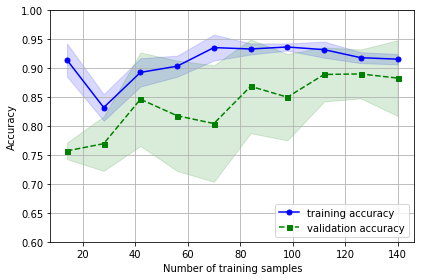

In [23]:
#learning curve
train_sizes, train_scores, test_scores = \
    learning_curve(estimator = pipeline, X = X_train, y = Y_train, train_sizes = np.linspace(.1, 1, 10), cv = 10, n_jobs = 1)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'training accuracy')

plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = .15, color = 'blue')

plt.plot(train_sizes, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, label = 'validation accuracy')

plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = .15, color = 'green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([.60, 1.0])
plt.tight_layout()
plt.show()

The learning curve seems to show convergence to a comparable accuracy for the training and validation accuracy as the number of training samples increase. The curve indicates low bias and low variance. 

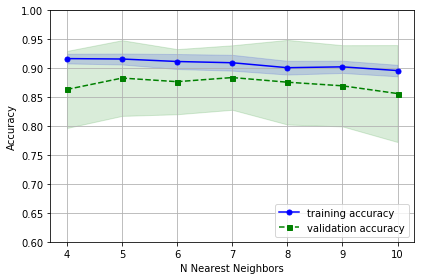

In [24]:
#Validation curve
train_scores, test_scores = validation_curve(estimator=pipeline, X=X_train, y=Y_train, param_name='kneighborsclassifier__n_neighbors', 
                param_range=k_range,cv=10)

param_range = k_range
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('N Nearest Neighbors')
plt.ylabel('Accuracy')
plt.ylim([.6, 1.0])
plt.tight_layout()
plt.show()

The validation curve produces a visual representation of what was performed earlier using grid search. The earlier result of 5 as the optimum number of nearest neighbors fits, but 7 is comparable if you 